In [2]:
import pandas as pd 
import numpy as np 
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [3]:
# this block of code is mostly for reading in data and seeing what it looks like

# air_quality_index.csv is the data from here: https://www.kaggle.com/sumandey/daily-air-quality-dataset-india
# it's the average air quality index data measured by pm2.5 for a 80 cities in India and the US
# lockdown_us.csv is the data from here: https://www.kaggle.com/lin0li/us-lockdown-dates-dataset
# Trips_by_Distance.csv is the data from here: https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv
# parsed down to only include county data for the US cities in the air_quality_index.csv dataset 

# load the datasets mentioned above
pm25 = pd.read_csv('air_quality_index.csv')
usLockdown = pd.read_csv('lockdown_us.csv')
tripsByDist = pd.read_csv('Trips_by_Distance.csv')

# see what the datasets look like
print(pm25)
print(usLockdown)
print(tripsByDist)

# see how many unique values we have in each column
print(pm25.nunique())
print(usLockdown.nunique())
print(tripsByDist.nunique())

# see what the different lockdown types are and their frequency
usLockdown.groupby(['Type']).groups.keys()
for key in usLockdown.groupby(['Type']).groups.keys():
    print(key,len(usLockdown.groupby(['Type']).groups[key]))

# see what states have had lockdowns 
for key in usLockdown.groupby(['State']).groups.keys():
    print(key)

# see what states we have trip data for
# see what states have had lockdowns 
for key in tripsByDist.groupby(['State Postal Code']).groups.keys():
    print(key)

# see the different cities and frequencies
for key in pm25.groupby(['CITY']).groups.keys():
    print(key,len(pm25.groupby(['CITY']).groups[key]))
i = 0
mini = 1000
for key in pm25.groupby(['COUNTRY','CITY']).groups.keys():
    i+=1
    num = len(pm25.groupby(['COUNTRY','CITY']).groups[key])
    print(i,key,num)
    if(num > 333 and num < mini and key[0] == 'US'):
        mini = num
print(mini)

#outliers: Columbia has 333 entries, Richmond has 692, San Diego has 709, Las Vegas has 851, the Bronx has 858

             DATE COUNTRY           CITY  VALUE
0      2019-01-01      US    San Antonio   42.0
1      2019-01-01      US     Saint Paul   21.0
2      2019-01-01      US         Denver   42.0
3      2019-01-01      US  San Francisco   13.0
4      2019-01-01      US        Madison   14.0
...           ...     ...            ...    ...
68983  2021-05-31      US        Detroit   42.0
68984  2021-05-31      US        Jackson   30.0
68985  2021-05-31      US      The Bronx   12.0
68986  2021-05-31      US      Manhattan   13.0
68987  2021-05-31      IN          Patna  127.0

[68988 rows x 4 columns]
           Country          State      County        Date              Type
0    United States        Alabama         NaN  2020-04-04      Stay at home
1    United States        Alabama  Birmingham  2020-03-24  Shelter in place
2    United States         Alaska         NaN  2020-03-28      Stay at home
3    United States        Arizona         NaN  2020-03-31      Stay at home
4    United States

In [4]:
# this block of code is to address the missing County values for when the lockdown was statewide by 
# imputing those data points with the string 'Statewide'

# find which indecies are empty
isMissing = usLockdown['County'].isnull()

#replace those indecies with Statewide
usLockdown.loc[isMissing,'County'] = 'Statewide'

# see if I fixed them all
numMissing = sum(usLockdown['County'].isnull())
print('There are',numMissing, 'empty County rows')

for key in usLockdown.groupby(['County']).groups.keys():
    print(key,len(usLockdown.groupby(['County']).groups[key]))

There are 0 empty County rows
Alachua 1
Allegheny 1
Altlanta 1
Amarillo 1
Ardmore 1
Athens 1
Avondale Estates 1
Beaver 1
Bell 1
Berks 1
Bexar 1
Birmingham 1
Blakely 1
Boone 1
Brazoria 1
Brookhaven 1
Broward 1
Bucks 1
Butler 1
Cameron 1
Carbon 1
Carrollton 1
Cass 1
Centre 1
Chambers 1
Chamblee 1
Charleston 1
Chester 1
Claremore 1
Clarke 1
Clarkston 1
Clay 1
Cobb 1
Cole 1
Collin 1
Columbia 1
Cumberland 1
Dade 1
Dallas 1
Dauphin 1
Davidson 1
Davis 1
Decatur 1
Delaware 1
Denton 1
Doraville 1
Dougherty 1
Dunwoody 1
Edmond 1
El Paso 1
Ellis 1
Erie 1
Forest Park 1
Fort Bend 1
Franklin 1
Galveston 1
Greene 1
Gregg 1
Gwinnett 1
Harris 1
Harrison 1
Hays 1
Hildalgo 1
Hillsborough 1
Hunt 1
Jackson 2
Jefferson 1
Kansas City 1
Kaufman 1
Knox 1
Lackawanna 1
Lancaster 1
Lauderdale 1
Lehigh 1
Leon 1
Liberty 1
Lubbock 1
Luzerne 1
McLennan 1
Miami 1
Monroe 2
Montgomery 1
Moore 1
Nacogdoches 1
Norman 1
Northampton 1
Nueces 1
Oklahoma City 1
Orange 1
Osceola 1
Oxford 1
Palm Beach 1
Philadelphia 1
Pike 1
Pi

In [6]:
# this block of code is to address the inconsistency where there are 37 shelter in place orders, 135 
# stay at home orders, and only one curfew by consolidating the shelter in place and curfew categories 
#into one shelter in place category

for i in range(len(usLockdown)):
    if(usLockdown.loc[i,'Type']) == 'Curfew':
        usLockdown.loc[i,'Type'] = 'Shelter in place'
        print(usLockdown.loc[i])

# make sure there's only two lockdown types now
for key in usLockdown.groupby(['Type']).groups.keys():
    print(key,len(usLockdown.groupby(['Type']).groups[key]))

Shelter in place 38
Stay at home 135


In [7]:
# this block of code is address the inconsistency of the Country column having 2 countries, United 
# States and Unites States, by just getting rid of the column
usLockdown = usLockdown.drop(columns = ['Country'])
print(usLockdown)

             State      County        Date              Type
0          Alabama   Statewide  2020-04-04      Stay at home
1          Alabama  Birmingham  2020-03-24  Shelter in place
2           Alaska   Statewide  2020-03-28      Stay at home
3          Arizona   Statewide  2020-03-31      Stay at home
4       California   Statewide  2020-03-19      Stay at home
..             ...         ...         ...               ...
168       Virginia   Statewide  2020-03-30      Stay at home
169     Washington   Statewide  2020-03-23      Stay at home
170  West Virginia   Statewide  2020-03-24      Stay at home
171      Wisconsin   Statewide  2020-03-25      Stay at home
172        Wyoming     Jackson  2020-03-28      Stay at home

[173 rows x 4 columns]


In [8]:
# this block addresses the inconsistency of including essex and hampton counties by removing
# their rows from the tripsByDist dataframe since these counties do not belong to the cities in
# the pm25 dataset (essex county was originally included for Salem, MA but it was determined the Salem
# in the pm25 dataset was Salem, OR; hampton county was actually supposed to be hampden county for
# Springfield, MA but it was determined the Springfield in the pm25 dataset was either Springfield, IL 
# or Springfield, MO)

# drop essex and hampton counties
essex = tripsByDist[tripsByDist['County Name'] == 'Essex County'].index
tripsByDist.drop(essex, inplace = True)
hampton = tripsByDist[tripsByDist['County Name'] == 'Hampton County'].index
tripsByDist.drop(hampton, inplace = True)

In [9]:
# this code block addresses the inconsistency of having lockdown data for states and territories
# that are not included in the pm25 and tripsByDist datasets

# find all the indeces with extraneous states
alabama = usLockdown[usLockdown['State'] == 'Alabama'].index
alaska = usLockdown[usLockdown['State'] == 'Alaska'].index
delaware = usLockdown[usLockdown['State'] == 'Delaware'].index
kansas = usLockdown[usLockdown['State'] == 'Kansas'].index
kentucky = usLockdown[usLockdown['State'] == 'Kentucky'].index
louisiana = usLockdown[usLockdown['State'] == 'Louisiana'].index
maine = usLockdown[usLockdown['State'] == 'Maine'].index
montana = usLockdown[usLockdown['State'] == 'Montana'].index
newHampshire = usLockdown[usLockdown['State'] == 'New Hampshire'].index
newJersey = usLockdown[usLockdown['State'] == 'New Jersey'].index
vermont = usLockdown[usLockdown['State'] == 'Vermont'].index
westVirginia = usLockdown[usLockdown['State'] == 'West Virginia'].index
wyoming = usLockdown[usLockdown['State'] == 'Wyoming'].index

# drop those indeces from the dataframe

# put extra states in a list to make dropping faster
states = [alabama, alaska, delaware, kansas, kentucky, louisiana, maine, montana, newHampshire, newJersey, vermont, westVirginia, wyoming]
for state in states:
    usLockdown.drop(state, inplace = True)

# print out remaining states to check everything worked right
for key in usLockdown.groupby(['State']).groups.keys():
    print(key)

print(usLockdown)

Arizona
California
Colorado
Connecticut
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Nevada
New Mexico
New York
North Carolina
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
Tennessee
Texas
Utah
Virginia
Washington
Wisconsin
                    State     County        Date          Type
3                 Arizona  Statewide  2020-03-31  Stay at home
4              California  Statewide  2020-03-19  Stay at home
5                Colorado  Statewide  2020-03-26  Stay at home
6             Connecticut  Statewide  2020-03-23  Stay at home
8    District of Columbia  Statewide  2020-04-01  Stay at home
..                    ...        ...         ...           ...
165                  Utah  Salt Lake  2020-03-30  Stay at home
166                  Utah     Summit  2020-03-27  Stay at home
168              Virginia  Statewide  2020-03-30  Stay at home
169            Washington  Statew

In [10]:
#deletes the the rows that have information about india in the air quality data set
pm25.drop(pm25[pm25['COUNTRY']== 'IN'].index, inplace = True)
pm25

,DATE,COUNTRY,CITY,VALUE
0,2019-01-01,US,San Antonio,42.0
1,2019-01-01,US,Saint Paul,21.0
2,2019-01-01,US,Denver,42.0
3,2019-01-01,US,San Francisco,13.0
4,2019-01-01,US,Madison,14.0
...,...,...,...,...
68981,2021-05-31,US,Phoenix,22.0
68983,2021-05-31,US,Detroit,42.0
68984,2021-05-31,US,Jackson,30.0
68985,2021-05-31,US,The Bronx,12.0


In [11]:
#reformatting the us lockdown info, united states will be replaced with us
usLockdown.replace(to_replace = 'United States',value = 'US')
usLockdown

,State,County,Date,Type
3,Arizona,Statewide,2020-03-31,Stay at home
4,California,Statewide,2020-03-19,Stay at home
5,Colorado,Statewide,2020-03-26,Stay at home
6,Connecticut,Statewide,2020-03-23,Stay at home
8,District of Columbia,Statewide,2020-04-01,Stay at home
...,...,...,...,...
165,Utah,Salt Lake,2020-03-30,Stay at home
166,Utah,Summit,2020-03-27,Stay at home
168,Virginia,Statewide,2020-03-30,Stay at home
169,Washington,Statewide,2020-03-23,Stay at home


In [12]:
# converting dates to datetime format
pm25['DATE'] = pd.to_datetime(pm25.DATE)
tripsByDist['Date'] = pd.to_datetime(tripsByDist.Date)

# replacing spaces in column names for tripsByDist dataframe
tripsByDist.columns = [c.replace(' ', '_') for c in tripsByDist.columns]

In [13]:
# creating way to convert between city and county
cities = pm25.CITY.unique()
cities.sort()
fipsCounties = [35001,13121,48453,24005,16001,25025,36047,37119,17031,45079,39049,48113,8031,26163,
48141,48439,6019,9003,15003,48201,18097,28049,12031,32003,5119,6037,55025,36061,47157,12086,55079,
47037,6001,40109,31055,42101,4013,41051,44007,36081,37183,51087,6067,27123,41047,49035,48029,6073,
6075,6085,53033,29077,36085,12073,36005,4019,11001]
cityToCounty = {}
for i in range(len(cities)):
    cityToCounty[cities[i]] = fipsCounties[i]
cityToCounty

{'Albuquerque': 35001,
 'Atlanta': 13121,
 'Austin': 48453,
 'Baltimore': 24005,
 'Boise': 16001,
 'Boston': 25025,
 'Brooklyn': 36047,
 'Charlotte': 37119,
 'Chicago': 17031,
 'Columbia': 45079,
 'Columbus': 39049,
 'Dallas': 48113,
 'Denver': 8031,
 'Detroit': 26163,
 'El Paso': 48141,
 'Fort Worth': 48439,
 'Fresno': 6019,
 'Hartford': 9003,
 'Honolulu': 15003,
 'Houston': 48201,
 'Indianapolis': 18097,
 'Jackson': 28049,
 'Jacksonville': 12031,
 'Las Vegas': 32003,
 'Little Rock': 5119,
 'Los Angeles': 6037,
 'Madison': 55025,
 'Manhattan': 36061,
 'Memphis': 47157,
 'Miami': 12086,
 'Milwaukee': 55079,
 'Nashville': 47037,
 'Oakland': 6001,
 'Oklahoma City': 40109,
 'Omaha': 31055,
 'Philadelphia': 42101,
 'Phoenix': 4013,
 'Portland': 41051,
 'Providence': 44007,
 'Queens': 36081,
 'Raleigh': 37183,
 'Richmond': 51087,
 'Sacramento': 6067,
 'Saint Paul': 27123,
 'Salem': 41047,
 'Salt Lake City': 49035,
 'San Antonio': 48029,
 'San Diego': 6073,
 'San Francisco': 6075,
 'San Jose

In [14]:
# adding county fips code column to pm25 dataset in order to line up the cities correctly 
fipsColumn = []
for city in pm25.CITY:
    fipsColumn.append(cityToCounty.get(city))
pm25.insert(3,'County_FIPS',fipsColumn)

# renaming date column to match trips dataset
pm25.rename(columns = {'DATE':'Date'},inplace=True)
pm25

,Date,COUNTRY,CITY,County_FIPS,VALUE
0,2019-01-01,US,San Antonio,48029,42.0
1,2019-01-01,US,Saint Paul,27123,21.0
2,2019-01-01,US,Denver,8031,42.0
3,2019-01-01,US,San Francisco,6075,13.0
4,2019-01-01,US,Madison,55025,14.0
...,...,...,...,...,...
68981,2021-05-31,US,Phoenix,4013,22.0
68983,2021-05-31,US,Detroit,26163,42.0
68984,2021-05-31,US,Jackson,28049,30.0
68985,2021-05-31,US,The Bronx,36005,12.0


In [15]:
# merging datasets 
fullDataSet = pd.merge(pm25,tripsByDist)
fullDataSet

,Date,COUNTRY,CITY,County_FIPS,VALUE,Level,State_FIPS,State_Postal_Code,County_Name,Population_Staying_at_Home,...,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,Row_ID
0,2019-01-01,US,San Antonio,48029,42.0,County,48,TX,Bexar County,427285,...,1316359,558125,763821,715704,141596,58644,35436,9558,5271,48-48029-20190101
1,2019-01-01,US,Saint Paul,27123,21.0,County,27,MN,Ramsey County,133995,...,331096,179545,245898,240548,43289,13244,10872,2865,4367,27-27123-20190101
2,2019-01-01,US,Denver,8031,42.0,County,8,CO,Denver County,208299,...,529812,253894,334305,276315,47988,26666,11341,3432,9759,08-08031-20190101
3,2019-01-01,US,San Francisco,6075,13.0,County,6,CA,San Francisco County,278086,...,598326,258653,263666,174784,78858,21497,7815,3940,5575,06-06075-20190101
4,2019-01-01,US,Madison,55025,14.0,County,55,WI,Dane County,124207,...,380376,188864,243762,199743,46587,26171,13551,3429,5619,55-55025-20190101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,2021-05-31,US,Phoenix,4013,22.0,County,4,AZ,Maricopa County,1004337,...,2703500,1265786,1906229,2025533,589340,156786,123967,31783,21936,04-04013-20210531
49805,2021-05-31,US,Detroit,26163,42.0,County,26,MI,Wayne County,396332,...,1236987,659732,765675,711035,157592,62657,51395,12395,3645,26-26163-20210531
49806,2021-05-31,US,Jackson,28049,30.0,County,28,MS,Hinds County,42283,...,174056,89680,105813,76159,19096,8949,7560,2455,226,28-28049-20210531
49807,2021-05-31,US,The Bronx,36005,12.0,County,36,NY,Bronx County,406102,...,1213317,525316,646042,508418,64861,28676,22973,3651,3924,36-36005-20210531


In [16]:
# removing duplicated data
fullDataSet = fullDataSet.drop_duplicates(subset=['Date','CITY'])
fullDataSet

,Date,COUNTRY,CITY,County_FIPS,VALUE,Level,State_FIPS,State_Postal_Code,County_Name,Population_Staying_at_Home,...,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,Row_ID
0,2019-01-01,US,San Antonio,48029,42.0,County,48,TX,Bexar County,427285,...,1316359,558125,763821,715704,141596,58644,35436,9558,5271,48-48029-20190101
1,2019-01-01,US,Saint Paul,27123,21.0,County,27,MN,Ramsey County,133995,...,331096,179545,245898,240548,43289,13244,10872,2865,4367,27-27123-20190101
2,2019-01-01,US,Denver,8031,42.0,County,8,CO,Denver County,208299,...,529812,253894,334305,276315,47988,26666,11341,3432,9759,08-08031-20190101
3,2019-01-01,US,San Francisco,6075,13.0,County,6,CA,San Francisco County,278086,...,598326,258653,263666,174784,78858,21497,7815,3940,5575,06-06075-20190101
4,2019-01-01,US,Madison,55025,14.0,County,55,WI,Dane County,124207,...,380376,188864,243762,199743,46587,26171,13551,3429,5619,55-55025-20190101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,2021-05-31,US,Phoenix,4013,22.0,County,4,AZ,Maricopa County,1004337,...,2703500,1265786,1906229,2025533,589340,156786,123967,31783,21936,04-04013-20210531
49805,2021-05-31,US,Detroit,26163,42.0,County,26,MI,Wayne County,396332,...,1236987,659732,765675,711035,157592,62657,51395,12395,3645,26-26163-20210531
49806,2021-05-31,US,Jackson,28049,30.0,County,28,MS,Hinds County,42283,...,174056,89680,105813,76159,19096,8949,7560,2455,226,28-28049-20210531
49807,2021-05-31,US,The Bronx,36005,12.0,County,36,NY,Bronx County,406102,...,1213317,525316,646042,508418,64861,28676,22973,3651,3924,36-36005-20210531


In [17]:
# removing some extra columns and reordering columns
fullDataSet = fullDataSet.drop(columns=['COUNTRY','Level','State_FIPS','Row_ID'])
fullDataSet.columns
fullDataSet = fullDataSet[['Date', 'CITY', 'County_FIPS', 'State_Postal_Code',
       'County_Name', 'Population_Staying_at_Home',
       'Population_Not_Staying_at_Home', 'Number_of_Trips',
       'Number_of_Trips_<1', 'Number_of_Trips_1-3', 'Number_of_Trips_3-5',
       'Number_of_Trips_5-10', 'Number_of_Trips_10-25',
       'Number_of_Trips_25-50', 'Number_of_Trips_50-100',
       'Number_of_Trips_100-250', 'Number_of_Trips_250-500',
       'Number_of_Trips_>=500','VALUE']]
fullDataSet

,Date,CITY,County_FIPS,State_Postal_Code,County_Name,Population_Staying_at_Home,Population_Not_Staying_at_Home,Number_of_Trips,Number_of_Trips_<1,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,VALUE
0,2019-01-01,San Antonio,48029,TX,Bexar County,427285,1576269,5066353,1461839,1316359,558125,763821,715704,141596,58644,35436,9558,5271,42.0
1,2019-01-01,Saint Paul,27123,MN,Ramsey County,133995,416326,1486467,414743,331096,179545,245898,240548,43289,13244,10872,2865,4367,21.0
2,2019-01-01,Denver,8031,CO,Denver County,208299,518912,2226450,732938,529812,253894,334305,276315,47988,26666,11341,3432,9759,42.0
3,2019-01-01,San Francisco,6075,CA,San Francisco County,278086,603463,2275791,862677,598326,258653,263666,174784,78858,21497,7815,3940,5575,13.0
4,2019-01-01,Madison,55025,WI,Dane County,124207,422488,1410350,302248,380376,188864,243762,199743,46587,26171,13551,3429,5619,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,2021-05-31,Phoenix,4013,AZ,Maricopa County,1004337,3481077,12952979,4128119,2703500,1265786,1906229,2025533,589340,156786,123967,31783,21936,22.0
49805,2021-05-31,Detroit,26163,MI,Wayne County,396332,1353011,5631785,1970672,1236987,659732,765675,711035,157592,62657,51395,12395,3645,42.0
49806,2021-05-31,Jackson,28049,MS,Hinds County,42283,189557,702246,218252,174056,89680,105813,76159,19096,8949,7560,2455,226,30.0
49807,2021-05-31,The Bronx,36005,NY,Bronx County,406102,1012105,4699565,1682387,1213317,525316,646042,508418,64861,28676,22973,3651,3924,12.0


In [18]:
dataViz = fullDataSet
fullDataSet

,Date,CITY,County_FIPS,State_Postal_Code,County_Name,Population_Staying_at_Home,Population_Not_Staying_at_Home,Number_of_Trips,Number_of_Trips_<1,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,VALUE
0,2019-01-01,San Antonio,48029,TX,Bexar County,427285,1576269,5066353,1461839,1316359,558125,763821,715704,141596,58644,35436,9558,5271,42.0
1,2019-01-01,Saint Paul,27123,MN,Ramsey County,133995,416326,1486467,414743,331096,179545,245898,240548,43289,13244,10872,2865,4367,21.0
2,2019-01-01,Denver,8031,CO,Denver County,208299,518912,2226450,732938,529812,253894,334305,276315,47988,26666,11341,3432,9759,42.0
3,2019-01-01,San Francisco,6075,CA,San Francisco County,278086,603463,2275791,862677,598326,258653,263666,174784,78858,21497,7815,3940,5575,13.0
4,2019-01-01,Madison,55025,WI,Dane County,124207,422488,1410350,302248,380376,188864,243762,199743,46587,26171,13551,3429,5619,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,2021-05-31,Phoenix,4013,AZ,Maricopa County,1004337,3481077,12952979,4128119,2703500,1265786,1906229,2025533,589340,156786,123967,31783,21936,22.0
49805,2021-05-31,Detroit,26163,MI,Wayne County,396332,1353011,5631785,1970672,1236987,659732,765675,711035,157592,62657,51395,12395,3645,42.0
49806,2021-05-31,Jackson,28049,MS,Hinds County,42283,189557,702246,218252,174056,89680,105813,76159,19096,8949,7560,2455,226,30.0
49807,2021-05-31,The Bronx,36005,NY,Bronx County,406102,1012105,4699565,1682387,1213317,525316,646042,508418,64861,28676,22973,3651,3924,12.0


In [19]:
# adding month column to dataset
dateConvert = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
    9:'September',10:'October',11:'November',12:'December'}
dateNums = fullDataSet.Date
dateNames = []
for dateNum in dateNums:
    dateNames.append(dateConvert.get(dateNum.month))
fullDataSet.insert(2,'Month',dateNames)
fullDataSet

,Date,CITY,Month,County_FIPS,State_Postal_Code,County_Name,Population_Staying_at_Home,Population_Not_Staying_at_Home,Number_of_Trips,Number_of_Trips_<1,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,VALUE
0,2019-01-01,San Antonio,January,48029,TX,Bexar County,427285,1576269,5066353,1461839,1316359,558125,763821,715704,141596,58644,35436,9558,5271,42.0
1,2019-01-01,Saint Paul,January,27123,MN,Ramsey County,133995,416326,1486467,414743,331096,179545,245898,240548,43289,13244,10872,2865,4367,21.0
2,2019-01-01,Denver,January,8031,CO,Denver County,208299,518912,2226450,732938,529812,253894,334305,276315,47988,26666,11341,3432,9759,42.0
3,2019-01-01,San Francisco,January,6075,CA,San Francisco County,278086,603463,2275791,862677,598326,258653,263666,174784,78858,21497,7815,3940,5575,13.0
4,2019-01-01,Madison,January,55025,WI,Dane County,124207,422488,1410350,302248,380376,188864,243762,199743,46587,26171,13551,3429,5619,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,2021-05-31,Phoenix,May,4013,AZ,Maricopa County,1004337,3481077,12952979,4128119,2703500,1265786,1906229,2025533,589340,156786,123967,31783,21936,22.0
49805,2021-05-31,Detroit,May,26163,MI,Wayne County,396332,1353011,5631785,1970672,1236987,659732,765675,711035,157592,62657,51395,12395,3645,42.0
49806,2021-05-31,Jackson,May,28049,MS,Hinds County,42283,189557,702246,218252,174056,89680,105813,76159,19096,8949,7560,2455,226,30.0
49807,2021-05-31,The Bronx,May,36005,NY,Bronx County,406102,1012105,4699565,1682387,1213317,525316,646042,508418,64861,28676,22973,3651,3924,12.0


In [20]:
# dropping additional columns so that only the inputs and outputs are left
fullDataSet = fullDataSet.drop(columns=['Date','County_FIPS','State_Postal_Code','County_Name'])

In [21]:
fullDataSet

,CITY,Month,Population_Staying_at_Home,Population_Not_Staying_at_Home,Number_of_Trips,Number_of_Trips_<1,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,VALUE
0,San Antonio,January,427285,1576269,5066353,1461839,1316359,558125,763821,715704,141596,58644,35436,9558,5271,42.0
1,Saint Paul,January,133995,416326,1486467,414743,331096,179545,245898,240548,43289,13244,10872,2865,4367,21.0
2,Denver,January,208299,518912,2226450,732938,529812,253894,334305,276315,47988,26666,11341,3432,9759,42.0
3,San Francisco,January,278086,603463,2275791,862677,598326,258653,263666,174784,78858,21497,7815,3940,5575,13.0
4,Madison,January,124207,422488,1410350,302248,380376,188864,243762,199743,46587,26171,13551,3429,5619,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,Phoenix,May,1004337,3481077,12952979,4128119,2703500,1265786,1906229,2025533,589340,156786,123967,31783,21936,22.0
49805,Detroit,May,396332,1353011,5631785,1970672,1236987,659732,765675,711035,157592,62657,51395,12395,3645,42.0
49806,Jackson,May,42283,189557,702246,218252,174056,89680,105813,76159,19096,8949,7560,2455,226,30.0
49807,The Bronx,May,406102,1012105,4699565,1682387,1213317,525316,646042,508418,64861,28676,22973,3651,3924,12.0


In [22]:
# adding columns for each city and month
monthCol = fullDataSet.Month
monthDF = pd.get_dummies(monthCol)
monthDF.insert(0,'Month',monthCol)
monthDF


citiesCol = fullDataSet.CITY 
cityDF = pd.get_dummies(citiesCol)
cityDF.insert(0,'CITY',citiesCol)
cityDF

,CITY,Albuquerque,Atlanta,Austin,Baltimore,Boise,Boston,Brooklyn,Charlotte,Chicago,...,San Diego,San Francisco,San Jose,Seattle,Springfield,Staten Island,Tallahassee,The Bronx,Tucson,Washington D.C.
0,San Antonio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Saint Paul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Denver,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,San Francisco,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Madison,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,Phoenix,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49805,Detroit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49806,Jackson,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49807,The Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
monthDF

,Month,April,August,December,February,January,July,June,March,May,November,October,September
0,January,0,0,0,0,1,0,0,0,0,0,0,0
1,January,0,0,0,0,1,0,0,0,0,0,0,0
2,January,0,0,0,0,1,0,0,0,0,0,0,0
3,January,0,0,0,0,1,0,0,0,0,0,0,0
4,January,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,May,0,0,0,0,0,0,0,0,1,0,0,0
49805,May,0,0,0,0,0,0,0,0,1,0,0,0
49806,May,0,0,0,0,0,0,0,0,1,0,0,0
49807,May,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
dateConvert.get(1)

'January'

In [25]:
monthCols = [monthDF.January,monthDF.February,monthDF.March,monthDF.April,
    monthDF.May,monthDF.June,monthDF.July,monthDF.August,monthDF.September,
    monthDF.October,monthDF.November,monthDF.December]
num = 2
for monthCol in monthCols:
    fullDataSet.insert(num,dateConvert.get(num-1),monthCol)
    num+=1
fullDataSet

,CITY,Month,January,February,March,April,May,June,July,August,...,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,VALUE
0,San Antonio,January,1,0,0,0,0,0,0,0,...,1316359,558125,763821,715704,141596,58644,35436,9558,5271,42.0
1,Saint Paul,January,1,0,0,0,0,0,0,0,...,331096,179545,245898,240548,43289,13244,10872,2865,4367,21.0
2,Denver,January,1,0,0,0,0,0,0,0,...,529812,253894,334305,276315,47988,26666,11341,3432,9759,42.0
3,San Francisco,January,1,0,0,0,0,0,0,0,...,598326,258653,263666,174784,78858,21497,7815,3940,5575,13.0
4,Madison,January,1,0,0,0,0,0,0,0,...,380376,188864,243762,199743,46587,26171,13551,3429,5619,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49804,Phoenix,May,0,0,0,0,1,0,0,0,...,2703500,1265786,1906229,2025533,589340,156786,123967,31783,21936,22.0
49805,Detroit,May,0,0,0,0,1,0,0,0,...,1236987,659732,765675,711035,157592,62657,51395,12395,3645,42.0
49806,Jackson,May,0,0,0,0,1,0,0,0,...,174056,89680,105813,76159,19096,8949,7560,2455,226,30.0
49807,The Bronx,May,0,0,0,0,1,0,0,0,...,1213317,525316,646042,508418,64861,28676,22973,3651,3924,12.0


In [26]:
# combining the datasets

fullDataSet = pd.merge(cityDF,fullDataSet)
# fullDataSet = pd.merge(monthDF,fullDataSet)
fullDataSet


,CITY,Albuquerque,Atlanta,Austin,Baltimore,Boise,Boston,Brooklyn,Charlotte,Chicago,...,Number_of_Trips_1-3,Number_of_Trips_3-5,Number_of_Trips_5-10,Number_of_Trips_10-25,Number_of_Trips_25-50,Number_of_Trips_50-100,Number_of_Trips_100-250,Number_of_Trips_250-500,Number_of_Trips_>=500,VALUE
0,San Antonio,0,0,0,0,0,0,0,0,0,...,1316359,558125,763821,715704,141596,58644,35436,9558,5271,42.0
1,San Antonio,0,0,0,0,0,0,0,0,0,...,1580318,702338,1008506,1044937,191998,61811,38244,10176,4576,28.0
2,San Antonio,0,0,0,0,0,0,0,0,0,...,1614257,743219,1081970,1145618,204631,61089,38506,9968,4438,53.0
3,San Antonio,0,0,0,0,0,0,0,0,0,...,1629633,755772,1120752,1203760,221072,67471,39801,9916,4175,25.0
4,San Antonio,0,0,0,0,0,0,0,0,0,...,1683595,779822,1103377,1115536,214768,67151,39155,9345,3940,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39871247,The Bronx,0,0,0,0,0,0,0,0,0,...,1348067,655744,775475,656692,62701,19361,10325,1798,2652,17.0
39871248,The Bronx,0,0,0,0,0,0,0,0,0,...,1293561,632496,761572,659231,59279,20943,16328,2279,2190,8.0
39871249,The Bronx,0,0,0,0,0,0,0,0,0,...,1224073,559068,660346,563745,68755,23823,18744,1832,2277,3.0
39871250,The Bronx,0,0,0,0,0,0,0,0,0,...,1052114,526653,669166,535800,68045,19935,16490,2015,3275,3.0


In [27]:
fullDataSet.columns
fullDataSet = fullDataSet.drop(columns=['CITY','Month'])

In [28]:
fullDataSet.columns

Index(['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Boise', 'Boston',
       'Brooklyn', 'Charlotte', 'Chicago', 'Columbia', 'Columbus', 'Dallas',
       'Denver', 'Detroit', 'El Paso', 'Fort Worth', 'Fresno', 'Hartford',
       'Honolulu', 'Houston', 'Indianapolis', 'Jackson', 'Jacksonville',
       'Las Vegas', 'Little Rock', 'Los Angeles', 'Madison', 'Manhattan',
       'Memphis', 'Miami', 'Milwaukee', 'Nashville', 'Oakland',
       'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Portland',
       'Providence', 'Queens', 'Raleigh', 'Richmond', 'Sacramento',
       'Saint Paul', 'Salem', 'Salt Lake City', 'San Antonio', 'San Diego',
       'San Francisco', 'San Jose', 'Seattle', 'Springfield', 'Staten Island',
       'Tallahassee', 'The Bronx', 'Tucson', 'Washington D.C.', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December',
       'Population_Staying_at_Home', 'Population_Not_Staying_at_Hom

In [29]:
# creating testing data and performing linear regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fullDataSet.drop(columns='VALUE'),fullDataSet.VALUE,
    test_size = 0.25, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

model.coef_

0.10783424692373433
0.10802141395321263


array([ 5.15066555e+04,  4.62449086e+04,  4.33607227e+04,  4.94821975e+04,
        5.42207188e+04,  4.98011825e+04,  2.57313397e+04,  4.56042374e+04,
       -9.77331328e+03,  5.51290645e+04,  4.27746438e+04,  2.46932137e+04,
        5.08553970e+04,  3.68475831e+04,  4.93169737e+04,  3.19996591e+04,
        4.71418931e+04,  4.85968917e+04,  4.74517946e+04, -3.78800892e+03,
        4.76055231e+04,  5.76498581e+04,  4.76978627e+04,  2.97461960e+04,
        5.54536768e+04, -7.67855284e+04,  5.33311764e+04,  3.84956132e+04,
        4.79785705e+04,  2.35739733e+04,  4.78615224e+04,  5.13113836e+04,
        3.79144395e+04,  4.98977132e+04,  5.29902747e+04,  3.91123549e+04,
       -6.68214898e+02,  4.96748803e+04,  5.20589917e+04,  2.99233827e+04,
        4.55833008e+04,  5.62863869e+04,  3.95470286e+04,  5.32776094e+04,
        5.60505504e+04,  4.49118426e+04,  3.33609129e+04,  1.50707723e+04,
        4.87392110e+04,  3.43958911e+04,  2.99373197e+04,  5.68076345e+04,
        5.42954447e+04,  

In [30]:
fullDataSet.columns

Index(['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Boise', 'Boston',
       'Brooklyn', 'Charlotte', 'Chicago', 'Columbia', 'Columbus', 'Dallas',
       'Denver', 'Detroit', 'El Paso', 'Fort Worth', 'Fresno', 'Hartford',
       'Honolulu', 'Houston', 'Indianapolis', 'Jackson', 'Jacksonville',
       'Las Vegas', 'Little Rock', 'Los Angeles', 'Madison', 'Manhattan',
       'Memphis', 'Miami', 'Milwaukee', 'Nashville', 'Oakland',
       'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Portland',
       'Providence', 'Queens', 'Raleigh', 'Richmond', 'Sacramento',
       'Saint Paul', 'Salem', 'Salt Lake City', 'San Antonio', 'San Diego',
       'San Francisco', 'San Jose', 'Seattle', 'Springfield', 'Staten Island',
       'Tallahassee', 'The Bronx', 'Tucson', 'Washington D.C.', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December',
       'Population_Staying_at_Home', 'Population_Not_Staying_at_Hom

In [31]:
coefsDF = pd.DataFrame({'Features':fullDataSet.drop(columns=['VALUE']).columns,'coeff':model.coef_})
coefsDF = coefsDF.sort_values(by=['coeff'])
coefsDF

,Features,coeff
25,Los Angeles,-76785.528397
79,Number_of_Trips_100-250,-21752.084040
80,Number_of_Trips_250-500,-21752.084036
73,Number_of_Trips_1-3,-21752.084010
76,Number_of_Trips_10-25,-21752.084007
...,...,...
44,Salem,56050.550362
41,Richmond,56286.386933
53,Tallahassee,56803.626383
51,Springfield,56807.634549


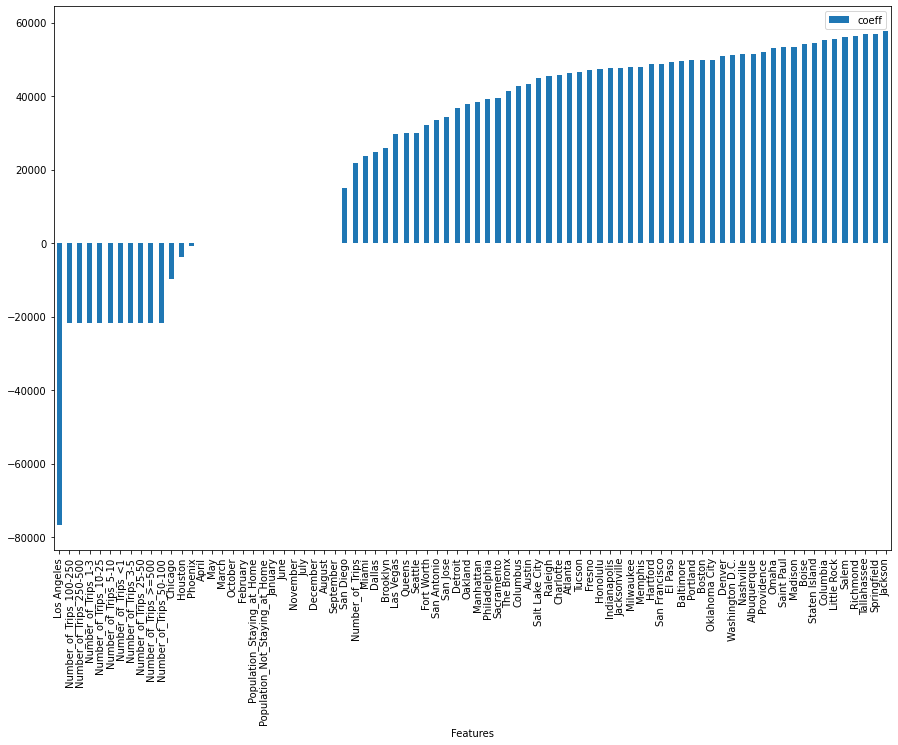

In [34]:
coefsDF.plot(x='Features',y='coeff',kind='bar',figsize=(15,10))
plt.show()

In [21]:
# make a data frame for each city 
cities = dataViz.groupby(['CITY']).groups.keys()
cityDfs = {}
for city in cities:
    cityDfs.update({city : dataViz.loc[dataViz['CITY'] == city, ['Date','Population_Staying_at_Home','Population_Not_Staying_at_Home','Number_of_Trips','Number_of_Trips_<1','Number_of_Trips_1-3','Number_of_Trips_3-5','Number_of_Trips_5-10','Number_of_Trips_10-25','Number_of_Trips_25-50','Number_of_Trips_50-100','Number_of_Trips_100-250','Number_of_Trips_250-500','Number_of_Trips_>=500','VALUE']]})

In [20]:
#plot all features for all cities over time
fig, axs = plt.subplots(14, sharex = True, figsize = (28,15))
print(cityDfs.keys())
ymin = 1000000000
ymax = 0
for i in range(14):
    column = cityDfs['Houston'].columns[i+1]
    #print(column)
    for key in cityDfs.keys():
        # get dates for x axis
        dates = cityDfs[key]['Date']
        # get values in current feature columns for y axis
        yvals = cityDfs[key][column]
        axs[i].plot(dates, yvals)
        if(ymin > min(yvals)):
            ymin = min(yvals)
        if(ymax < max(yvals)):
            ymax = max(yvals)
        if(key == 'Washington D.C.'):
            axs[i].set_ylim(ymin, ymax)
            axs[i].set_title(column)
            ymin = 1000000000
            ymax = 0
for ax in axs:
    ax.label_outer()
    ax.set_xlim(min(dates),max(dates))
fig.legend(cityDfs.keys(), bbox_to_anchor = (0.1,0.1,0.975,0.9))
fig.tight_layout(h_pad=1)
fig.show()
fig.savefig('all_cities.png')

In [25]:
# only focus on the 5 most populated cities
bigCities = {}

# combine NYC boroughs info to make a df representing NYC
nyc = ['Staten Island', 'Brooklyn', 'The Bronx', 'Manhattan', 'Queens']
bnb = pd.merge(cityDfs['Brooklyn'], cityDfs['The Bronx'], on = 'Date')

# add brooklyn and the bronx together
for column in cityDfs['Houston'].columns:
    if not(column == 'Date'):
        right = column + '_x'
        left = column + '_y'
        if not(column == 'VALUE'):
            bnb[column] = bnb[right] + bnb[left]
            bnb = bnb.drop(columns = [left, right])
        else:
            #df.rename(columns={"OldName":"NewName"})
            bnb = bnb.rename(columns={right : 'VALUE_brook'})
            bnb = bnb.rename(columns={left : 'VALUE_bronx'})
#print(bnb.columns)

# add manhattan to brooklyn and the bronx
bbm = pd.merge(bnb, cityDfs['Manhattan'], on = 'Date')
for column in cityDfs['Houston'].columns:
    if not(column == 'Date'):
        right = column + '_x'
        left = column + '_y'
        if not(column == 'VALUE'):
            bbm[column] = bbm[right] + bbm[left]
            bbm = bbm.drop(columns = [left, right])
        else:
            bbm = bbm.rename(columns = {column : 'VALUE_man'})
#print(bbm.columns)

# add queens to manhattan, brooklyn, and the bronx
bbmq = pd.merge(bbm, cityDfs['Queens'], on = 'Date')
for column in cityDfs['Houston'].columns:
    if not(column == 'Date'):
        right = column + '_x'
        left = column + '_y'
        if not(column == 'VALUE'):
            bbmq[column] = bbmq[right] + bbmq[left]
            bbmq = bbmq.drop(columns = [left, right])
        else:
            bbmq = bbmq.rename(columns = {column : 'VALUE_que'})
#print(bbmq.columns)

# add Staten Island to queens, manhattan, brooklyn, and the bronx
nyc = pd.merge(bbmq, cityDfs['Staten Island'], on = 'Date')
for column in cityDfs['Houston'].columns:
    if not(column == 'Date'):
        right = column + '_x'
        left = column + '_y'
        if not(column == 'VALUE'):
            nyc[column] = nyc[right] + nyc[left]
            nyc = nyc.drop(columns = [left, right])
        else:
            nyc = nyc.rename(columns = {column : column+ '_stat'})

# get average of 5 columns of borough pm25 values
#print(nyc.columns)
nyc['VALUE'] = (nyc['VALUE_brook'] + nyc['VALUE_bronx'] + nyc['VALUE_man'] + nyc['VALUE_que'] + nyc['VALUE_stat'])/5
nyc = nyc.drop(columns = ['VALUE_brook','VALUE_bronx', 'VALUE_man', 'VALUE_que', 'VALUE_stat'])
#print(nyc.columns)

# make dictionary for 5 largest cities and their dataframes
top5 = ['Houston', 'Los Angeles', 'Chicago', 'New York','Phoenix']
for key in cityDfs.keys():
    for city in top5:
        if key == city:
            bigCities.update({key : cityDfs[key]})
bigCities.update({'New York' : nyc})
#print(bigCities)

In [26]:
# plot all features for 5 largest cities
fig, axs = plt.subplots(14, sharex = True, figsize = (28,20))
ymin = 1000000000
ymax = 0
for i in range(14):
    column = bigCities['Houston'].columns[i+1]
    #print(column)
    for key in bigCities.keys():
        # get dates for x axis
        dates = bigCities[key]['Date']
        # get values in current feature columns for y axis
        yvals = bigCities[key][column]
        axs[i].plot(dates, yvals)
        if(ymin > min(yvals)):
            ymin = min(yvals)
        if(ymax < max(yvals)):
            ymax = max(yvals)
        if(key == 'New York'):
            axs[i].set_ylim(ymin, ymax)
            axs[i].set_title(column)
            ymin = 1000000000
            ymax = 0
for ax in axs:
    ax.label_outer()
    ax.set_xlim(min(dates),max(dates))
fig.legend(bigCities.keys(), bbox_to_anchor = (0.1,0.1,0.95,0.875))
fig.tight_layout(h_pad=1)
fig.show()
fig.savefig('top5all.png')

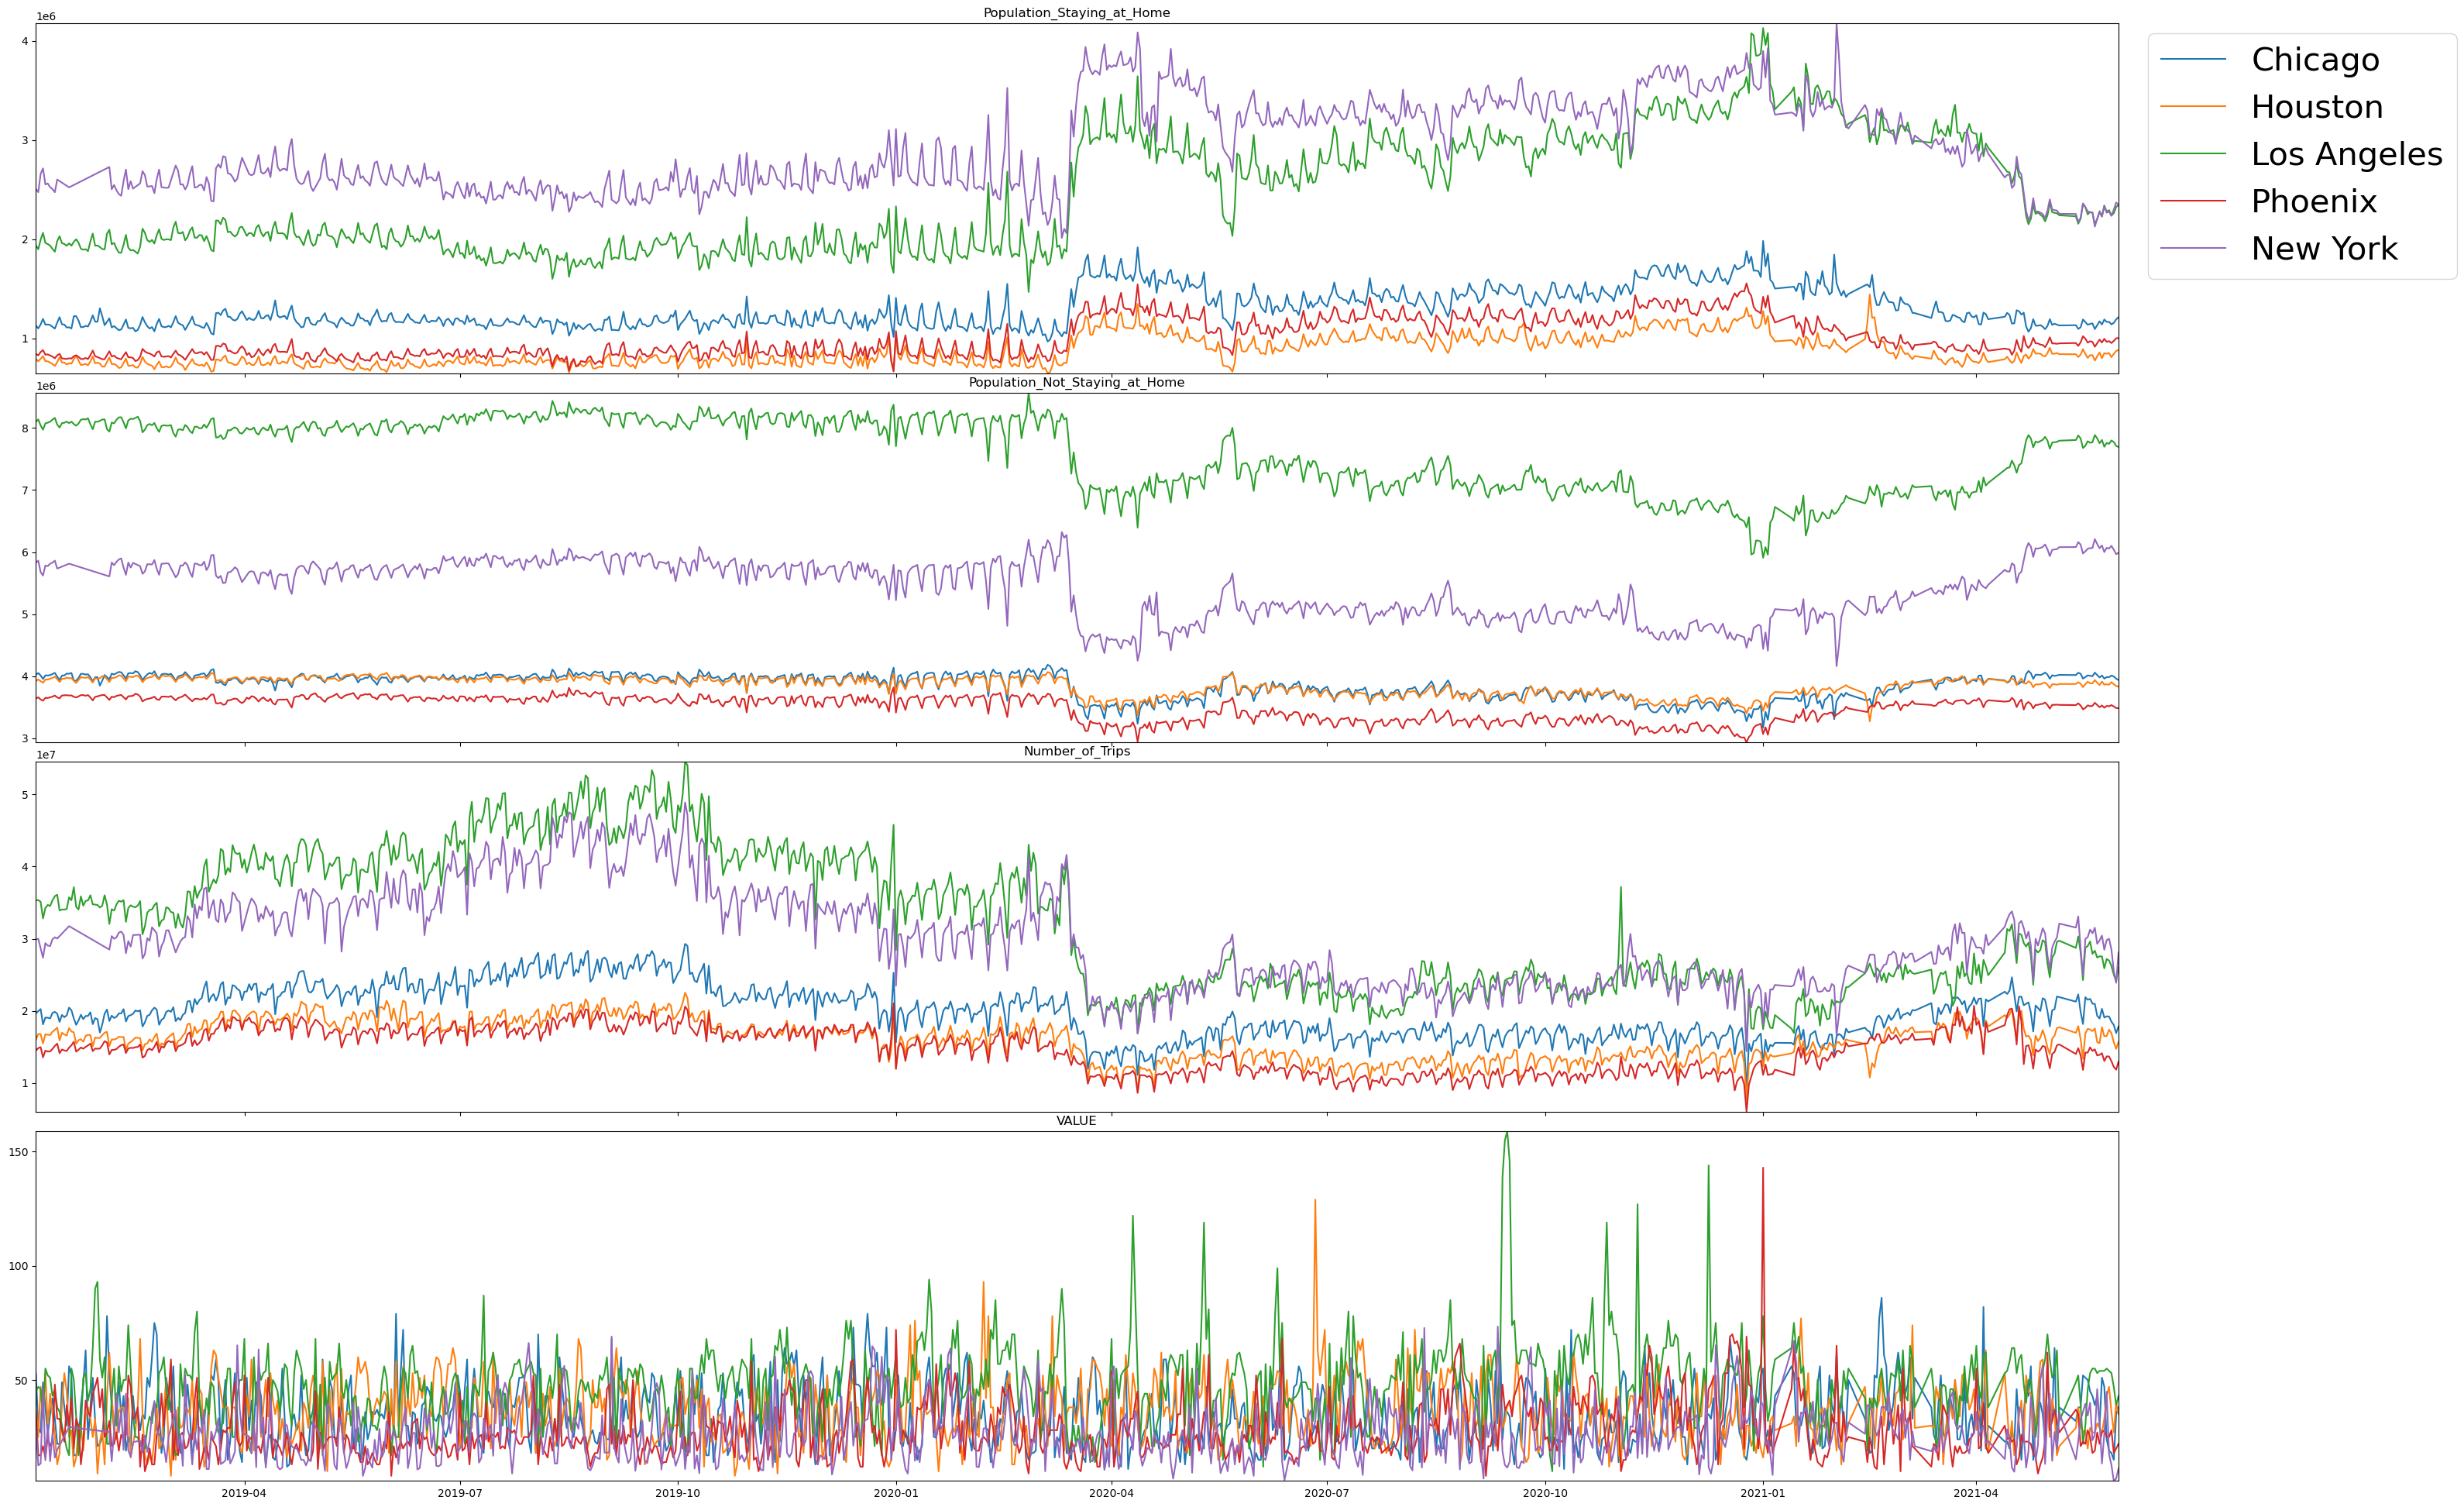

In [27]:
# plot all Population_Not_Staying_at_Home, Population_Staying_at_Home, Number_of_Trips, and pm25 
# values for 5 largest cities
fig, axs = plt.subplots(4, sharex = True, figsize = (28,20))
ymin = 1000000000
ymax = 0
columns = ['Population_Staying_at_Home','Population_Not_Staying_at_Home','Number_of_Trips','VALUE']
for i in range(4):
    column = columns[i]
    #print(column)
    for key in bigCities.keys():
        # get dates for x axis
        dates = bigCities[key]['Date']
        # get values in current feature columns for y axis
        yvals = bigCities[key][column]
        axs[i].plot(dates, yvals)
        if(ymin > min(yvals)):
            ymin = min(yvals)
        if(ymax < max(yvals)):
            ymax = max(yvals)
        if(key == 'New York'):
            axs[i].set_ylim(ymin, ymax)
            axs[i].set_title(column)
            ymin = 1000000000
            ymax = 0
for ax in axs:
    ax.label_outer()
    ax.set_xlim(min(dates),max(dates))
plt.rc('font', size = 25)
plt.rc('legend', fontsize=30) 
fig.legend(bigCities.keys(), bbox_to_anchor = (0.1,0.1,1.05,0.875))
fig.tight_layout(h_pad=0)
fig.show()
fig.savefig('top5_final.png', transparent = True)